In [1]:
# Notebook SetUp
from calc_flow import process_flow
import re
import os
import tracemalloc
import timeit
from pathlib import Path
import pandas as pd
import tifffile as tf
import matplotlib.pyplot as plt
import numpy as np

#### Set up optical flow parameters
# Spatial smoothing (voxels)
xyzSig = 3
# Temporal smoothing (frames)
tSig = 1
# Lucas-Kanade neighborhood size (voxels)
wSig = 4

# Saving and loading
mainDir = 'X:\\Force Project\\PublicationData\\PerformanceTests'
mainDir = Path(mainDir)
program = 'Python'
savename = mainDir / 'PerformanceData_Python_workstation.csv'

In [2]:
# 2D data in the 'OneTif' format

imDir = 'X:\\Force Project\\PublicationData\\PerformanceTests\\2D_OneTif'
fileType = 'OneTif'
spatialDimensions = 2
    
imNamePattern = re.compile('.*.tif')
files = os.listdir(imDir)
for imName in files:
    m = imNamePattern.fullmatch(imName)
    if m:
        print('FILE: ' + imName)

        meta = tf.TiffFile(Path(imDir) / imName)
        Ny = meta.pages[0].shape[0]
        Nx = meta.pages[0].shape[1]
        Nv = Nx*Ny
        del meta, Ny, Nx

        imName = imName.replace('.tif','')

        tracemalloc.start()

        t = timeit.timeit(lambda: process_flow(imDir,imName,fileType,spatialDimensions,xyzSig,tSig,wSig),'gc.enable()',number=10) # 10 matches what was done in MATLAB

        trsize, trpeak = tracemalloc.get_traced_memory()

        param = {'program': program,
                'imageDirectory': imDir,
                'imageName': imName,
                'processingType': fileType,
                'spatialDimensions': [spatialDimensions],
                'xyzSig': [xyzSig],
                'tiSig': [tSig],
                'wSig': [wSig],
                'TotalTime': [t],
                'PeakMemory': [trpeak],
                'Nvoxels': [Nv]}
        param = pd.DataFrame(param)

        param.to_csv(savename, index=False, mode='a',header=False)
        tracemalloc.reset_peak()

        print(' ') # Print a gap between files

print(' ') # Print a gap between folders

FILE: 20241107_U2OS_SGRLC_100Xoil_15mintimelapse_01_25plaser-slice7-1024-frames1-7.tif
Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly for reading the output files.
 
2025-05-06 16:48:50.039553 - No data will be saved for frame 0 to avoid edge effects
2025-05-06 16:48:50.039603 - No data will be saved for frame 1 to avoid edge effects
2025-05-06 16:48:50.039647 - No data will be saved for frame 2 to avoid edge effects
2025-05-06 16:48:50.050439 - Processing frame 3...
2025-05-06 16:48:50.631047 - Frame 3 saved.  Duration: 0:00:00.580604
2025-05-06 16:48:50.631260 - No data will be saved for frame 4 to avoid edge effects
2025-05-06 16:48:50.631358 - No data will be saved for frame 5 to avoid edge effects
2025-05-06 16:48:50.631451 - No data will be saved for frame 6 to avoid edge effects
Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly 

In [3]:
# 2D data in the 'SequenceT' format

imDir = 'X:\\Force Project\\PublicationData\\PerformanceTests\\2D_Sequence'
imName = '20241107_U2OS_SGRLC_100Xoil_15mintimelapse_01_25plaser-slice7_t.*'
fileType = 'SequenceT'
spatialDimensions = 2
    
meta = tf.TiffFile(Path(imDir) / '20241107_U2OS_SGRLC_100Xoil_15mintimelapse_01_25plaser-slice7_t0000.tif')
Ny = meta.pages[0].shape[0]
Nx = meta.pages[0].shape[1]
Nv = Nx*Ny
del meta, Ny, Nx

imName = imName.replace('.tif','')

tracemalloc.start()

t = timeit.timeit(lambda: process_flow(imDir,imName,fileType,spatialDimensions,xyzSig,tSig,wSig),'gc.enable()',number=10) # 10 matches what was done in MATLAB

trsize, trpeak = tracemalloc.get_traced_memory()

param = {'program': program,
        'imageDirectory': imDir,
        'imageName': imName,
        'processingType': fileType,
        'spatialDimensions': [spatialDimensions],
        'xyzSig': [xyzSig],
        'tiSig': [tSig],
        'wSig': [wSig],
        'TotalTime': [t],
        'PeakMemory': [trpeak],
        'Nvoxels': [Nv]}
param = pd.DataFrame(param)

param.to_csv(savename, index=False, mode='a',header=False)
tracemalloc.reset_peak()

Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly for reading the output files.
 
2025-05-06 16:48:56.827928 - No data will be saved for frame 0 to avoid edge effects
2025-05-06 16:48:56.827976 - No data will be saved for frame 1 to avoid edge effects
2025-05-06 16:48:56.828017 - No data will be saved for frame 2 to avoid edge effects
2025-05-06 16:48:56.828087 - Processing frame 3...
2025-05-06 16:48:58.746270 - Frame 3 saved.  Duration: 0:00:01.918177
2025-05-06 16:48:58.746500 - No data will be saved for frame 4 to avoid edge effects
2025-05-06 16:48:58.746589 - No data will be saved for frame 5 to avoid edge effects
2025-05-06 16:48:58.746674 - No data will be saved for frame 6 to avoid edge effects
Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly for reading the output files.
 
2025-05-06 16:48:58.767064 - No data will be saved for 

In [4]:
# 3D data in the 'OneTif' format

imDir = 'X:\\Force Project\\PublicationData\\PerformanceTests\\3D_OneTif'
fileType = 'OneTif'
spatialDimensions = 3

imNamePattern = re.compile('.*.tif')
files = os.listdir(imDir)
for imName in files:
    m = imNamePattern.fullmatch(imName)
    if m:
        print('FILE: ' + imName)

        meta = tf.TiffFile(Path(imDir) / imName)
        Ny = meta.pages[0].shape[0]
        Nx = meta.pages[0].shape[1]
        Nz = meta.imagej_metadata["slices"]
        Nv = Nx*Ny*Nz
        del meta, Ny, Nx, Nz

        imName = imName.replace('.tif','')

        tracemalloc.start()

        t = timeit.timeit(lambda: process_flow(imDir,imName,fileType,spatialDimensions,xyzSig,tSig,wSig),'gc.enable()',number=10) # 10 matches what was done in MATLAB

        trsize, trpeak = tracemalloc.get_traced_memory()

        param = {'program': program,
                'imageDirectory': imDir,
                'imageName': imName,
                'processingType': fileType,
                'spatialDimensions': [spatialDimensions],
                'xyzSig': [xyzSig],
                'tiSig': [tSig],
                'wSig': [wSig],
                'TotalTime': [t],
                'PeakMemory': [trpeak],
                'Nvoxels': [Nv]}
        param = pd.DataFrame(param)

        param.to_csv(savename, index=False, mode='a',header=False)
        tracemalloc.reset_peak()

        print(' ') # Print a gap between files

print(' ') # Print a gap between folders

FILE: 20241107_U2OS_SGRLC_100Xoil_15mintimelapse_01_25plaser-frames1-7.tif
Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly for reading the output files.
 
2025-05-06 16:49:15.832357 - No data will be saved for frame 0 to avoid edge effects
2025-05-06 16:49:15.832409 - No data will be saved for frame 1 to avoid edge effects
2025-05-06 16:49:15.832459 - No data will be saved for frame 2 to avoid edge effects
2025-05-06 16:49:15.845203 - Processing frame 3...
2025-05-06 16:57:51.312248 - Frame 3 saved.  Duration: 0:08:35.467041
2025-05-06 16:57:51.312459 - No data will be saved for frame 4 to avoid edge effects
2025-05-06 16:57:51.312556 - No data will be saved for frame 5 to avoid edge effects
2025-05-06 16:57:51.312657 - No data will be saved for frame 6 to avoid edge effects
Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly for reading 

In [5]:
# 3D data in the 'SequenceT' format

imDir = 'X:\\Force Project\\PublicationData\\PerformanceTests\\3D_Sequence'
imName = 'scan_Cam1_ch0_tile0_t.*_deskew_after_decon'
fileType = 'SequenceT'
spatialDimensions = 3
    
meta = tf.TiffFile(Path(imDir) / 'scan_Cam1_ch0_tile0_t0000_deskew_after_decon.tif')
Ny = meta.pages[0].shape[0]
Nx = meta.pages[0].shape[1]
Nz = len(meta.pages)
Nv = Nx*Ny*Nz
del meta, Ny, Nx, Nz

imName = imName.replace('.tif','')

tracemalloc.start()

t = timeit.timeit(lambda: process_flow(imDir,imName,fileType,spatialDimensions,xyzSig,tSig,wSig),'gc.enable()',number=10) # 10 matches what was done in MATLAB

trsize, trpeak = tracemalloc.get_traced_memory()

param = {'program': program,
        'imageDirectory': imDir,
        'imageName': imName,
        'processingType': fileType,
        'spatialDimensions': [spatialDimensions],
        'xyzSig': [xyzSig],
        'tiSig': [tSig],
        'wSig': [wSig],
        'TotalTime': [t],
        'PeakMemory': [trpeak],
        'Nvoxels': [Nv]}
param = pd.DataFrame(param)

param.to_csv(savename, index=False, mode='a',header=False)
tracemalloc.reset_peak()

Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly for reading the output files.
 
2025-05-06 18:16:06.277271 - No data will be saved for frame 0 to avoid edge effects
2025-05-06 18:16:06.277323 - No data will be saved for frame 1 to avoid edge effects
2025-05-06 18:16:06.277397 - No data will be saved for frame 2 to avoid edge effects
2025-05-06 18:16:06.277467 - Processing frame 3...
2025-05-06 18:42:34.513348 - Frame 3 saved.  Duration: 0:26:28.235872
2025-05-06 18:42:34.513599 - No data will be saved for frame 4 to avoid edge effects
2025-05-06 18:42:34.513736 - No data will be saved for frame 5 to avoid edge effects
2025-05-06 18:42:34.513828 - No data will be saved for frame 6 to avoid edge effects
Note: regardless of input filenames, the first image = frame 0.
If your file names start from 0, adjust indexing accordingly for reading the output files.
 
2025-05-06 18:42:35.088789 - No data will be saved for 

In [2]:
m = pd.read_csv(mainDir / 'PerformanceData_MATLAB_workstation.csv')
p = pd.read_csv(mainDir / 'PerformanceData_Python_workstation.csv')
mL = pd.read_csv(mainDir / 'PerformanceData_MATLAB_Laptop.csv')
pL = pd.read_csv(mainDir / 'PerformanceData_Python_Laptop.csv')

# print(m.columns)
# print(p.columns)
# print(mL.columns)
# print(pL.columns)

mSlice = m.loc[:,['imageName','TotalTime','PeakMem','Nvoxels']]
mMeans = mSlice.groupby('imageName').mean()
mMax = mSlice.groupby('imageName').max()

mSliceL = mL.loc[:,['imageName','TotalTime','PeakMem','Nvoxels']]
mMeansL = mSliceL.groupby('imageName').mean()

p = p.sort_values(by='Nvoxels')
mMeans = mMeans.sort_values(by='Nvoxels')
pL = pL.sort_values(by='Nvoxels')
mMeansL = mMeansL.sort_values(by='Nvoxels')

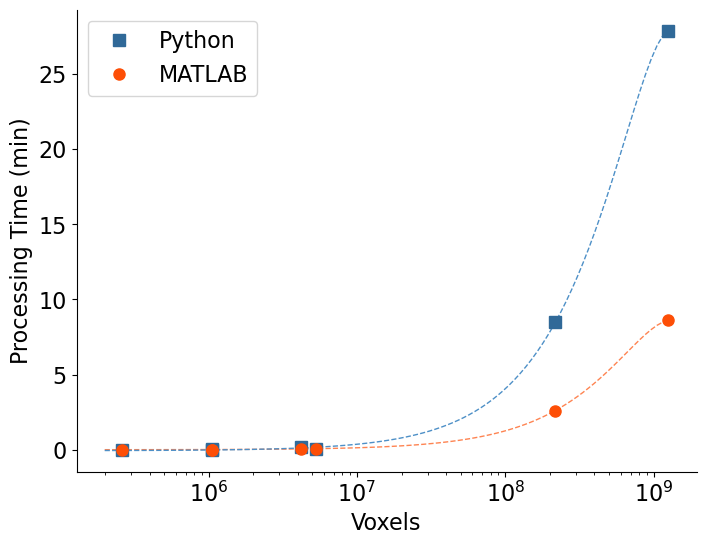

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)

plt.rcParams.update({'font.size': 16}) # Set global font size

plt.plot(p.loc[:,'Nvoxels'],p.loc[:,'TotalTime']/60/10,'s',label="Python",markersize=8,color="#306998") # Divide by 10 for the number of iterations
plt.plot(mMeans.loc[:,'Nvoxels'],mMeans.loc[:,'TotalTime']/60,'o',label="MATLAB",markersize=8,color="#fd4e06")
# plt.plot(pL.loc[:,'Nvoxels'],pL.loc[:,'TotalTime']/60/10,'s',label="Python",markersize=8,color="#306998",fillstyle='none') # Divide by 10 for the number of iterations
# plt.plot(mMeansL.loc[:,'Nvoxels'],mMeansL.loc[:,'TotalTime']/60,'o',label="MATLAB",markersize=8,color="#fd4e06",fillstyle='none')

# Fits for a rough illustration of the trend
pm = np.polyfit(mMeans.loc[:,'Nvoxels'],mMeans.loc[:,'TotalTime'],2)
xPlot = np.logspace(5.3,9.1,100)
yPlot = np.polyval(pm,xPlot)
plt.plot(xPlot,yPlot/60,'--',color="#fe8452",zorder=0,linewidth=1)

pm = np.polyfit(p.loc[:,'Nvoxels'],p.loc[:,'TotalTime']/10,2)
xPlot = np.logspace(5.3,9.1,100)
yPlot = np.polyval(pm,xPlot)
plt.plot(xPlot,yPlot/60,'--',color="#4e90c7",zorder=0,linewidth=1)

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel('Voxels')
ax.set_ylabel('Processing Time (min)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.legend()

# Save 
plt.savefig(mainDir / 'ProcessingTime_Python_and_MATLAB.png', dpi=300, bbox_inches='tight')
plt.savefig(mainDir / 'ProcessingTime_Python_and_MATLAB.svg', dpi=300, bbox_inches='tight')
# Show
plt.show()

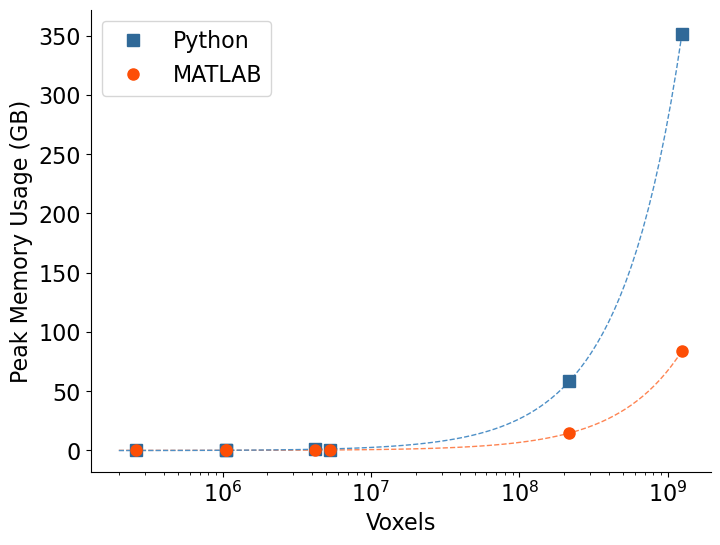

In [7]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)

plt.rcParams.update({'font.size': 16}) # Set global font size

plt.plot(p.loc[:,'Nvoxels'],p.loc[:,'PeakMem']/1024**3,'s',label="Python",markersize=8,color="#306998") # Divide by 10 for the number of iterations
plt.plot(mMax.loc[:,'Nvoxels'],mMax.loc[:,'PeakMem']/1024**3,'o',label="MATLAB",markersize=8,color="#fd4e06")

# Fits for a rough illustration of the trend
pm = np.polyfit(mMax.loc[:,'Nvoxels'],mMax.loc[:,'PeakMem']/1024**3,2)
xPlot = np.logspace(5.3,9.1,100)
yPlot = np.polyval(pm,xPlot)
plt.plot(xPlot,yPlot,'--',color="#fe8452",zorder=0,linewidth=1)

pm = np.polyfit(p.loc[:,'Nvoxels'],p.loc[:,'PeakMem']/1024**3,2)
xPlot = np.logspace(5.3,9.1,100)
yPlot = np.polyval(pm,xPlot)
plt.plot(xPlot,yPlot,'--',color="#4e90c7",zorder=0,linewidth=1)

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel('Voxels')
ax.set_ylabel('Peak Memory Usage (GB)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.legend()

# Save 
plt.savefig(mainDir / 'MemoryUsage_Python_and_MATLAB.png', dpi=300, bbox_inches='tight')
plt.savefig(mainDir / 'MemoryUsage_Python_and_MATLAB.svg', dpi=300, bbox_inches='tight')
# Show
plt.show()